In [1]:
from sklearn import datasets
import pandas as pd

In [25]:
iris=datasets.load_iris() #아이리스 데이터가져옴
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.keys() #키 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
labels=pd.DataFrame(iris.target)
data=pd.DataFrame(iris.data)
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
labels.columns=['labels']

In [12]:
data.columns=['Sepal length','Sepal width','Petal length','Petal width'] #열이름설정해줌

In [14]:
labels
data
data=pd.concat([data, labels], axis=1) #좌우로 합침
data

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
feature=data[['Sepal length','Sepal width']]
feature

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# knn k를 정해주면 k개 만큼의 이웃을 참조하여 분류
# KMeans는 랜덤하게 K개 만큼의 점을 생성하고 그 점을 중심점이라 칭하고 중심점을 기준으로 
#k개 만큼의 클러스터를 생성

In [18]:
model=KMeans(n_clusters=3) #클러스터 몇개할지 정해줌, 다양하게 바꿔가면서 ..

In [19]:
model.fit(feature)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
pred=pd.DataFrame(model.predict(feature))
pred.columns=['predict']

In [23]:
res=pd.concat([feature, pred], axis=1)
res

,Sepal length,Sepal width,predict
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


In [24]:
data

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
model.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [27]:
centers=pd.DataFrame(model.cluster_centers_,
                     columns=['Sepal length', 'Sepal width'])

In [28]:
c_x=centers['Sepal length']
c_y=centers['Sepal width']

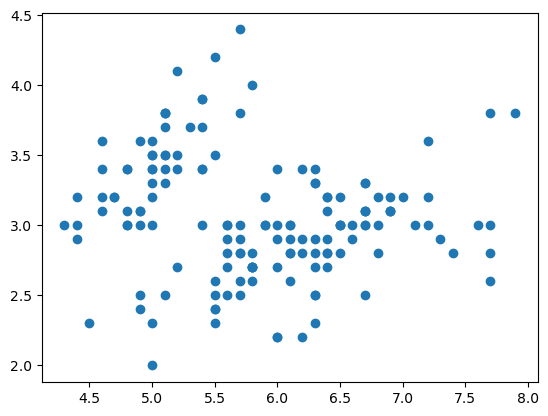

In [29]:
plt.scatter(res['Sepal length'], res['Sepal width'])

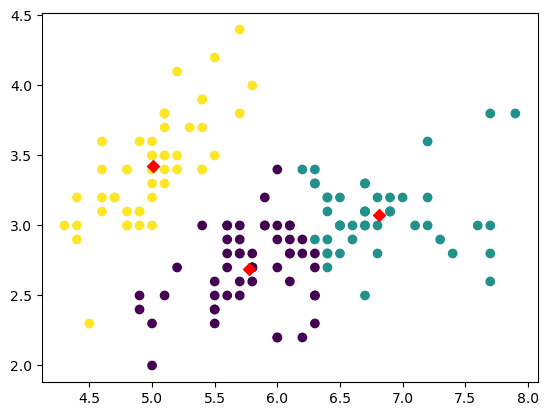

In [31]:
plt.scatter(res['Sepal length'], res['Sepal width'], c=res['predict'])
plt.scatter(c_x, c_y, c='r', marker='D')

In [34]:
pd.crosstab(data['labels'], res['predict']) #크로스테이블이라는 함수

predict,0,1,2
labels,,,
0,0,0,50
1,38,12,0
2,15,35,0


In [35]:
print(123/150)

0.82


In [36]:
###SNS 데이터를 바탕으로 학생 클러스터 생성###

In [37]:
data=pd.read_csv("snsdata.csv")
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data.info() #결측값이 gender,age열만 있다는것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [39]:
data.describe() #기술통계 함수(수치데이터에 대해서만 나온다, 문자인 젠더는 빼고 나왔음)대략적인 분포 확인
#평균mean이 중위수 50%보다 높은것은 극다적으로 높은 값이 있다는것을 알 수 있다

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [40]:
data.describe(include='object') #문자 데이터 기술통계확인
#F많다 freq빈도수 F(여자)22054건, M(남자)가 약 5천건  

,gender
count,27276
unique,2
top,F
freq,22054


In [41]:
data.isnull().sum() #열단위로 결측값 갯수 확인

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [42]:
data['gender'].value_counts() #성별의 분포가 한쪽으로 쏠린것을 알 수 있다

F    22054
M     5222
Name: gender, dtype: int64

In [44]:
data['gender'].value_counts(dropna=False) #na값도 같이 보고싶을때 dropna=False

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [45]:
data['gender'].fillna("not disclosed", inplace=True) #결측값을 fillna로 채워줬다 문자not disclosed로 채워줌

In [47]:
data.isnull().sum()

gradyear           0
gender             0
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [48]:
data['gender'].value_counts()

F                22054
M                 5222
not disclosed     2724
Name: gender, dtype: int64

In [50]:
data['age'].isnull().sum() #5086

#졸업연도별 나이의 평균을 구하시오.

5086

In [60]:
data.groupby('gradyear').get_group(2006)
data.groupby('gradyear').groups.keys() #키(졸업연도, 벨류(데이터))
data.groupby('gradyear').groups
data.groupby('gradyear').age.mean() #졸업연도별로 그룹별해주고 그룹별로 나이 평균해줌

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [ ]:
# age 열이 결측값인 데이터에 대해, 동일한 gradyear 값에 대한 
# 그룹별 age의 평균값으로 결측값을 대체

In [64]:
data['age']=data.groupby('gradyear')['age'].transform(lambda x:x.fillna(x.mean())) #transform함수로 변환해줌
# 그룹화해주고 그룹화 해준거에서 졸업연도가 x에 전달 
#졸업연도에서 나이열만 뽑아서 연도별 평균값으로 결측값을대체- transfrom함수가 데이터프레임 대상으로 변환해줌

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        30000 non-null  object 
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [68]:
data[data['age']>100]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
70,2006,not disclosed,106.686,24,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
573,2006,F,106.261,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710,2006,M,105.840,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,2006,not disclosed,106.864,28,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
796,2006,M,106.927,47,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28936,2009,M,105.971,47,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29677,2009,F,106.801,67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29809,2009,F,106.130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29922,2009,F,106.864,44,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

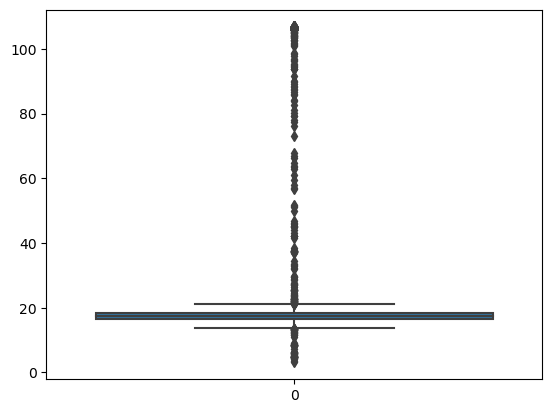

In [69]:
sns.boxplot(data['age']) #상자그림

In [73]:
q1=data['age'].quantile(0.25) # 16.504
q3=data['age'].quantile(0.75) # 18.391

In [74]:
iqr=q3-q1

In [78]:
q1-1.5*iqr #13.672
q3+1.5*iqr #21.222

df=data[(data['age']>(q1-1.5*iqr)) & (data['age']<(q3+1.5*iqr))]  #아웃라이어는 아니라는 뜻
#29633 rows × 40 columns
#아웃라이어를 제외한 정상 범위의 데이터마 추출하여 데이터프레임 구성

In [79]:
df.shape

(29633, 40)

In [80]:
df['age'].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

<Axes: >

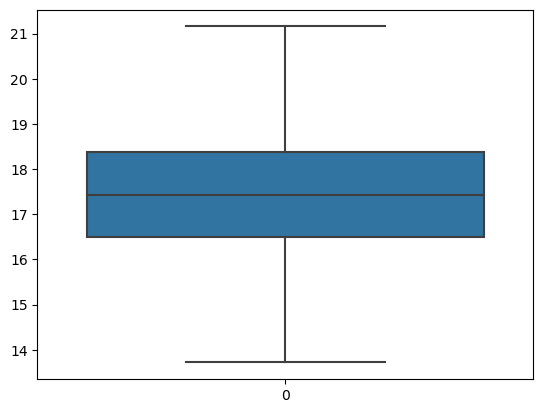

In [81]:
sns.boxplot(df['age'])

In [82]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ex) 
# basketball = 10 => 표준화 => -1 => 평균보다 적게 언급했다는 뜻
# football = 3 => 표준화 => 2 => 평균보다 많이 언급했다는 뜻

In [149]:
names = df.columns[4:] # gradyear gender age 열 뺴고 단어 열만 보려고
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [150]:
scaled_feature=data.copy()
#copy함수 사용해야 어느한쪽에서 내용이 바뀌어도 영향 안받는다
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
features = scaled_feature[names]
features

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
features.values #데이터프레임을 바로넣으면안되서 .values해서 array로 변환해줌

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler=StandardScaler().fit(features.values) #fit을해서 표준화 할수있는 
#StandardScaler평균을 제거하고 데이터를 단위 분산으로 조정한다. 
#그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다.

In [155]:
features=scaler.transform(features.values) #표준화작업 진행

In [156]:
features.shape

(30000, 36)

In [157]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
scaled_feature[names]=features

In [159]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,2009,M,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,2009,M,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,2009,M,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


In [160]:
scaled_feature.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2007.500000,17.982148,30.179467,5.494864e-17,-4.547474e-17,1.515825e-17,3.031649e-17,3.789561e-18,1.894781e-17,-3.789561e-17,...,-8.289665e-18,-1.136868e-17,5.873820e-17,1.515825e-17,5.494864e-17,1.136868e-17,-9.687066e-17,-1.610564e-17,-1.515825e-17,1.752672e-17
std,1.118053,7.169862,36.530877,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,2006.000000,3.086000,0.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,2006.750000,16.504000,3.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,2007.500000,17.443000,20.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,2008.250000,18.391459,44.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2009.000000,106.927000,830.000000,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,1.729137e+01,...,1.683073e+02,1.687776e+01,1.469812e+01,1.661229e+01,2.575205e+01,2.843431e+01,3.493308e+01,3.179061e+01,1.982379e+01,4.613268e+01


In [161]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,2009,M,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,2009,M,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,2009,M,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


In [162]:
def gen_to_num(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3

In [163]:
scaled_feature['gender']=scaled_feature['gender'].apply(gen_to_num) 
#apply함수로 gender열 문자들을 미리 지정해둔 gen_to_num함수적용

In [164]:
scaled_feature['gender']

0        1
1        2
2        1
3        2
4        3
        ..
29995    1
29996    1
29997    1
29998    1
29999    2
Name: gender, Length: 30000, dtype: int64

In [167]:
scaled_feature[names]=features
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,1,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,2009,1,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,2009,1,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,2009,1,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


In [168]:
scaled_feature.describe()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2007.500000,1.916733,17.982148,30.179467,5.494864e-17,-4.547474e-17,1.515825e-17,3.031649e-17,3.789561e-18,1.894781e-17,...,-8.289665e-18,-1.136868e-17,5.873820e-17,1.515825e-17,5.494864e-17,1.136868e-17,-9.687066e-17,-1.610564e-17,-1.515825e-17,1.752672e-17
std,1.118053,0.507880,7.169862,36.530877,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,2006.000000,1.000000,3.086000,0.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,2006.750000,2.000000,16.504000,3.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,2007.500000,2.000000,17.443000,20.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,2008.250000,2.000000,18.391459,44.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2009.000000,3.000000,106.927000,830.000000,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,...,1.683073e+02,1.687776e+01,1.469812e+01,1.661229e+01,2.575205e+01,2.843431e+01,3.493308e+01,3.179061e+01,1.982379e+01,4.613268e+01


In [169]:
kmeans=KMeans(n_clusters=5, random_state=42) 
#매번 할때마다 변하면 안된다 random_state로 ex오늘날짜로 지정해주면 매번 같은데이터로 비교가능

In [170]:
model=kmeans.fit(scaled_feature)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [171]:
model.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [173]:
model.cluster_centers_ #중심점의 좌표

array([[ 2.00743788e+03,  1.91033673e+00,  1.80783944e+01,
         6.14571913e+00, -5.25998612e-02, -3.12937775e-02,
        -3.19932940e-02, -5.40118741e-02, -5.08218551e-02,
        -3.56649254e-02, -3.89582024e-02, -2.52662335e-02,
        -1.21558612e-02, -2.74078123e-02, -6.03110292e-02,
        -2.08207550e-03, -2.23308047e-02, -3.80015075e-02,
        -1.63276611e-02, -4.86250133e-02, -2.34525607e-02,
        -1.70832472e-02, -4.15590927e-02, -2.95176052e-02,
        -3.77616327e-02, -5.24165207e-02, -2.97633681e-02,
        -9.53848037e-03, -2.51064527e-02, -3.47686188e-02,
        -9.64447646e-03, -5.22328961e-02, -7.52561799e-02,
        -2.86656171e-02, -4.24611416e-02, -3.97022654e-02,
        -8.37503068e-03, -3.02556646e-02, -9.97389730e-03,
         1.03725933e-02],
       [ 2.00762347e+03,  1.95241395e+00,  1.78884190e+01,
         7.04668515e+01,  7.94351337e-02,  4.70922626e-02,
         5.30506436e-02,  1.01858593e-01,  5.71699049e-02,
         3.98489135e-02,  6.61

In [174]:
data['cluster']=model.labels_

In [179]:
data.head()
data.groupby(['cluster']).groups
data.groupby(['cluster']).count()['age']

cluster
0    15324
1     4329
2     1239
3     8955
4      153
Name: age, dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

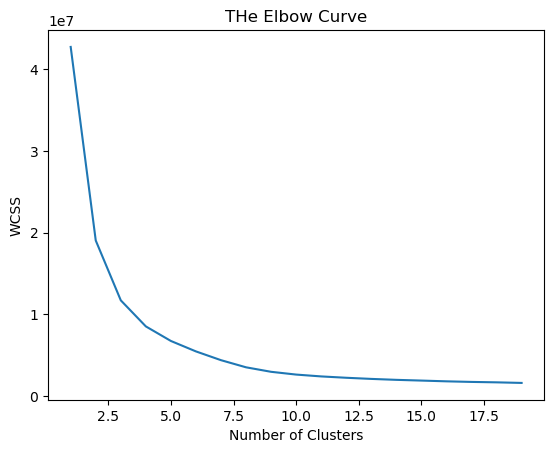

In [180]:
wcss = [] #within cluster sum of square 
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()
#max_iter=300 은 300번 넘어가면 강제로끝냄 

In [194]:
kmeans = KMeans(n_clusters=11, random_state=41)
kmeans.fit(scaled_feature)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=11, random_state=41)

In [195]:
kmeans.labels_

array([2, 2, 7, ..., 2, 2, 2])

In [196]:
data['cluster'] = kmeans.labels_

In [197]:
import numpy as np

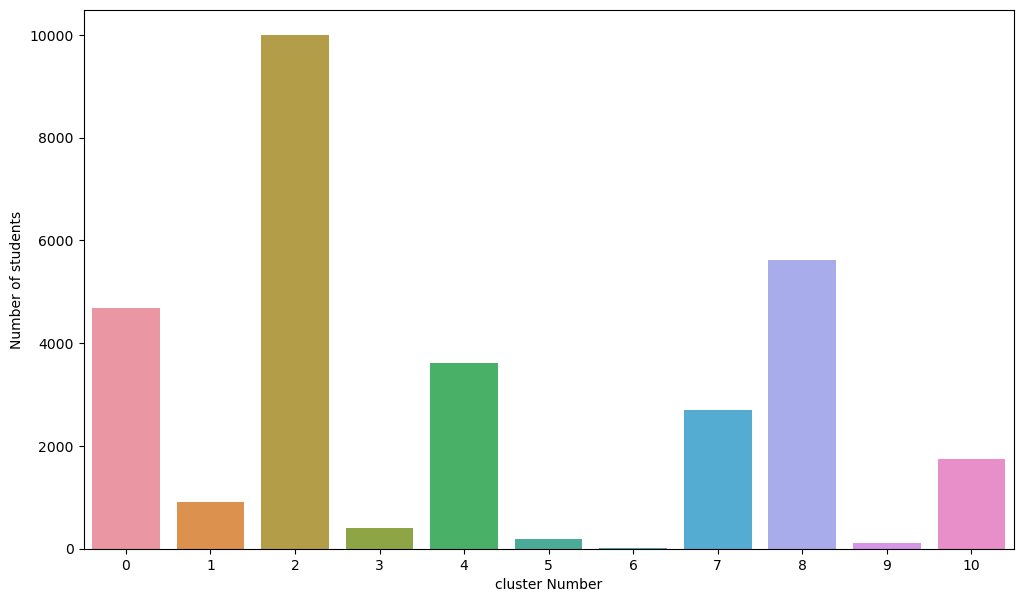

In [198]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,11,1), y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

In [199]:
data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

C:\Users\user\AppData\Local\Temp\ipykernel_10312\375450235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]


,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.293641,0.259710,0.252241,0.160905,0.164533,0.151515,0.111822,0.111182,0.088988,0.149168,...,0.084720,0.253308,0.360435,0.159198,0.062953,0.046948,0.183099,0.119505,0.088348,0.050576
1,0.373614,0.283814,0.236142,0.284922,0.187361,0.138581,0.205100,0.141907,0.092018,0.154102,...,0.127494,0.417960,0.472284,0.160754,0.134146,0.088692,0.207317,0.137472,0.113082,0.036585
2,0.215094,0.209088,0.181063,0.111200,0.100791,0.106696,0.080873,0.086478,0.077270,0.121109,...,0.074667,0.207387,0.282454,0.131919,0.051646,0.037434,0.167551,0.093884,0.080072,0.063157
3,0.399516,0.305085,0.249395,0.198547,0.215496,0.169492,0.200969,0.104116,0.106538,0.118644,...,0.152542,0.450363,0.554479,0.176755,0.142857,0.118644,0.210654,0.145278,0.135593,0.070218
4,0.291402,0.277855,0.244125,0.196019,0.176113,0.150954,0.107824,0.110036,0.095936,0.160907,...,0.173072,0.284490,0.406691,0.153719,0.087365,0.053083,0.209289,0.140724,0.089301,0.062759
5,0.181818,0.151515,0.212121,0.080808,0.106061,0.151515,0.035354,0.060606,0.121212,0.075758,...,0.065657,0.202020,0.171717,0.070707,0.055556,0.030303,0.242424,0.121212,0.080808,0.050505
6,0.285714,0.000000,0.000000,0.142857,0.857143,0.000000,1.285714,0.285714,0.000000,0.142857,...,0.285714,0.000000,1.000000,0.000000,0.142857,0.142857,0.285714,0.285714,0.142857,0.000000
7,0.329516,0.274104,0.247506,0.248984,0.183229,0.158847,0.129294,0.117473,0.088290,0.161433,...,0.110085,0.310307,0.423716,0.177687,0.096047,0.080532,0.179165,0.127447,0.096786,0.065017
8,0.245333,0.274311,0.214400,0.140978,0.134222,0.136000,0.100622,0.103822,0.090844,0.143289,...,0.092622,0.245867,0.335289,0.145067,0.061156,0.045511,0.197156,0.115022,0.092800,0.066133
